# Modelo VAR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./data/CalidadAire.csv")

In [3]:
df = df[df["ESTACION"]==8]

In [4]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format = '%Y-%m-%d %H:%M:%S')

In [5]:
df.index = df['FECHA']

In [6]:
df.drop(['Unnamed: 0', 'ESTACION', 'FECHA'], axis=1, inplace=True)
df.dropna(inplace=True)

In [7]:
#check the dtypes
df.dtypes

SO2     float64
CO      float64
NO2     float64
PM10    float64
O3      float64
dtype: object

In [8]:
# Chequeo la estacionariedad
from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_johansen(df,-1,1).eig

array([0.13259921, 0.09934309, 0.05633134, 0.01949153, 0.00361836])

In [9]:
# Creando los conjuntos de datos de train y validation
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]

In [10]:
# Entreno el modelo
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

/Users/miguel/Dev/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [11]:
# Hago predicción sobre los datos de validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [12]:
# Convierto prediction a dataframe
cols = df.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])

for j in range(0,5):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error

#check RMSE
print('RMSE values')
media=0
for i in cols:
    print(i, ':', sqrt(mean_squared_error(pred[i], valid[i])))
    media =+ sqrt(mean_squared_error(pred[i], valid[i]))
    
media = media/5
print("El error medio es: ", media)

RMSE values
SO2 : 5.105466860213757
CO : 0.24448301203082343
NO2 : 30.941074903069413
PM10 : 18.61386343623298
O3 : 31.809517664876644
El error medio es:  6.361903532975329


In [14]:
# Hago predicciones finales
horas_a_predecir = 24 * 30
model = VAR(endog=df)
model_fit = model.fit()
prediction_final = model_fit.forecast(model_fit.y, steps=horas_a_predecir)
prediction_final

/Users/miguel/Dev/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


array([[ 8.30566954,  0.16046591, 38.1613323 , 10.0524286 , 50.97298688],
       [ 8.55244992,  0.2108377 , 42.35559698, 11.87361061, 49.79172223],
       [ 8.74969519,  0.25253609, 45.74366815, 13.47736702, 48.79350657],
       ...,
       [ 9.11886142,  0.41592905, 57.28116564, 22.32883794, 41.89994652],
       [ 9.11886142,  0.41592905, 57.28116564, 22.32883794, 41.89994652],
       [ 9.11886142,  0.41592905, 57.28116564, 22.32883794, 41.89994652]])

In [15]:
# Convierto predicciones finales a dataframe
cols = df.columns
pred_final = pd.DataFrame(index=range(0,len(prediction_final)),columns=[cols])

for j in range(0,5):
    for i in range(0, len(prediction_final)):
        pred_final.iloc[i][j] = prediction_final[i][j]

In [16]:
# Generando fechas para la predicción y asignándola de índice en el dataframe
import datetime
datelist = pd.date_range(max(df.index) + datetime.timedelta(hours=1), 
                         freq='H', periods=len(pred_final))

pred_final.index = datelist

pred_final

,SO2,CO,NO2,PM10,O3
2019-04-01 00:00:00,8.30567,0.160466,38.1613,10.0524,50.973
2019-04-01 01:00:00,8.55245,0.210838,42.3556,11.8736,49.7917
2019-04-01 02:00:00,8.7497,0.252536,45.7437,13.4774,48.7935
2019-04-01 03:00:00,8.90558,0.286839,48.4636,14.8801,47.95
2019-04-01 04:00:00,9.02718,0.314882,50.6331,16.0994,47.2366
2019-04-01 05:00:00,9.12057,0.337661,52.3517,17.1532,46.6325
2019-04-01 06:00:00,9.19092,0.356043,53.703,18.0592,46.1198
2019-04-01 07:00:00,9.24259,0.370774,54.7569,18.8342,45.6834
2019-04-01 08:00:00,9.27927,0.382495,55.5715,19.4939,45.3106
2019-04-01 09:00:00,9.30401,0.391746,56.1947,20.0529,44.9907


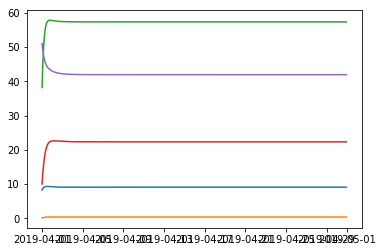

In [17]:
plt.plot(pred_final)

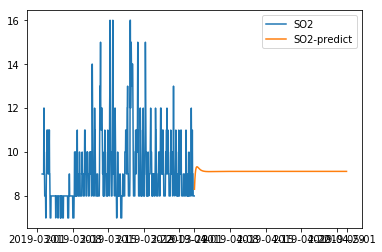

In [18]:
# Sacando gráfica de cada sustancia contaminante con su predicción:

# SO2

df_all = pd.merge(pd.DataFrame(df['SO2'][-horas_a_predecir:]), 
                  pd.DataFrame(pred_final['SO2']), 
                  how = 'outer', left_index=True, right_index=True)
plt.plot(df_all)
plt.legend(('SO2', 'SO2-predict'))

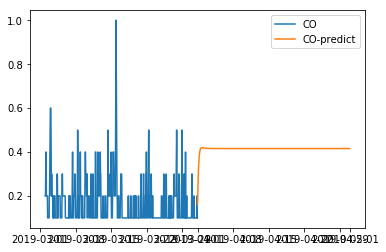

In [19]:
# CO

df_all = pd.merge(pd.DataFrame(df['CO'][-horas_a_predecir:]), 
                  pd.DataFrame(pred_final['CO']), 
                  how = 'outer', left_index=True, right_index=True)
plt.plot(df_all)
plt.legend(('CO', 'CO-predict'))

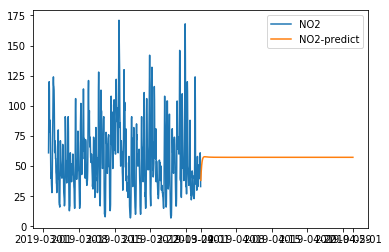

In [20]:
# NO2

df_all = pd.merge(pd.DataFrame(df['NO2'][-horas_a_predecir:]), 
                  pd.DataFrame(pred_final['NO2']), 
                  how = 'outer', left_index=True, right_index=True)
plt.plot(df_all)
plt.legend(('NO2', 'NO2-predict'))

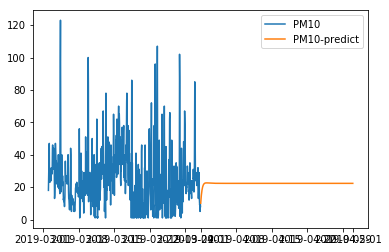

In [21]:
# PM10

df_all = pd.merge(pd.DataFrame(df['PM10'][-horas_a_predecir:]), 
                  pd.DataFrame(pred_final['PM10']), 
                  how = 'outer', left_index=True, right_index=True)
plt.plot(df_all)
plt.legend(('PM10', 'PM10-predict'))

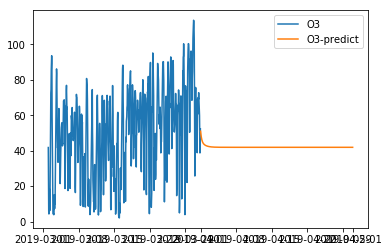

In [22]:
# O3

df_all = pd.merge(pd.DataFrame(df['O3'][-horas_a_predecir:]), 
                  pd.DataFrame(pred_final['O3']), 
                  how = 'outer', left_index=True, right_index=True)
plt.plot(df_all)
plt.legend(('O3', 'O3-predict'))